<img src = "https://www.formula1.com/content/dam/fom-website/manual/Misc/2021manual/2021AbuDhabiGPmanualadds/Post/GettyImages-1237242156.jpg.transform/9col/image.jpg">

# Is Lewis Hamilton The G.O.A.T. of F1?

#### By Joshua Noppenberger

### Introduction

For those unfamiliar with Formula 1, it is an international racing series of open wheel cars that races annually everywhere from Monaco to Brazil and the US. While it is not especially popular in the United States with domestic competitors NASCAR and IndyCar generally garnering more attention(although that may be beginning to change), it is the most popular form of racing in the [world](https://www.pitpass.com/66811/The-Most-Popular-Motorsport-Series-In-The-World). 

One of the most popular racers in Formula One is indeed Lewis Hamilton, with tens of millions of followers on various social media platforms he is definitely the most popular person associated with F1 right now. From his first season in 2007 to his record-equalling 7th world championship in 2020, Lewis Hamilton has achieved success in Formula One that is almost unparalled. Such a great amount of success begs the ultimate question, Is Lewis Hamilton the Greatest Formula One Driver of All Time? Using Formula One historical data, utilizing relevant, meaningful statistics along with visualizations I hope I can conclusively provide an answer to that question.


###Collecting the Data

In order to analyze and make sense of Formula One data in order to compare Lewis Hamilton to other all time greats we must first import the relevant Python libraries to complete this task.






In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Source of the Data

For this project we will be using data from [this](https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020/version/13) Kaggle dataset which has a wealth of information on Formula One from its inception in 1950 through the 2021 season.

In [175]:
#Importing the Data into three separate Dataframes

drivers = pd.read_csv('drivers.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
standings = pd.read_csv('driver_standings.csv')

Next we should make sense of each of these three dataframes to get a sense for what information and columns are present for us to work with. We can do this by displaying the first few rows of each dataframe.

In [176]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [177]:
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [178]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [179]:
standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


Next we will combine each of the tables using an [Inner Join]('https://support.microsoft.com/en-us/office/inner-join-operation-b9e73ab6-884a-403e-9f22-cb502feae36a#:~:text=Inner%20joins%20combine%20records%20from,the%20employees%20in%20each%20department.') on the column DriverID and then RaceID.

In [180]:
res = pd.merge(results, drivers, on='driverId') #Merging the results and drivers frames on the driverId column
resdf = pd.merge(res, races, on='raceId') #Merging the new results frame to add race data
resdf.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality,url_x,year,round,circuitId,name,date,time_y,url_y
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...


###Data Cleaning

Next we will remove irrelevant columns from our dataframe so we can then only focus on the relevant data for our visualizations.

In [181]:
resdf1 = resdf.drop(columns = ['circuitId', 'time_y', 'url_y', 'url_x'])
resdf1.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality,year,round,name,date
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,2008,1,Australian Grand Prix,2008-03-16
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,2008,1,Australian Grand Prix,2008-03-16
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,2008,1,Australian Grand Prix,2008-03-16
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,2008,1,Australian Grand Prix,2008-03-16
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,2008,1,Australian Grand Prix,2008-03-16


###Wins

We now have every result in F1 history from 1950 through 2021. In order to determine who is the Greatest there are a variety of statistics we should analyze. The first and probably most relevant statistic to look at first is Wins by each racer. Obviously a win is finishing a race in first place.

<img src = 'https://imgresizer.eurosport.com/unsafe/1200x0/filters:format(jpeg):focal(1584x508:1586x506)/origin-imgresizer.eurosport.com/2020/11/15/2937217-60300308-2560-1440.jpg'>

In [182]:
#First we look at what the data types of each column are:
resdf1.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number_x            object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time_x              object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
driverRef           object
number_y            object
code                object
forename            object
surname             object
dob                 object
nationality         object
year                 int64
round                int64
name                object
date                object
dtype: object

In [183]:
#Code to generate a Series which pairs the Referred Name with the Total number of times finished in Position 1, indicating a win.
wins = resdf1[resdf1['positionOrder'] == 1]
wins1 = wins.groupby(['driverRef'])['positionOrder'].sum() #Counting number of wins
wins2 = wins1.sort_values(ascending=False)
wins3 = wins2.head(8)
wins3

driverRef
hamilton              98
michael_schumacher    91
vettel                53
prost                 51
senna                 41
alonso                32
mansell               31
stewart               27
Name: positionOrder, dtype: int64

Next we can visualize the Top Drivers in terms of wins with a [bar chart]("https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html").

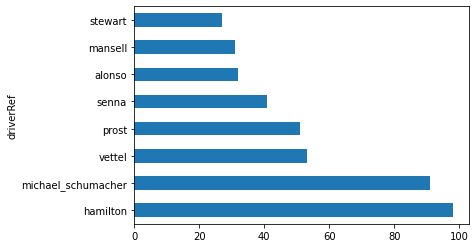

In [184]:
wins3.plot.barh(x = 'Driver', y = 'wins', rot = 0)

Clearly, Hamilton has the most race wins of any driver in F1 History. The only driver that is close is Michael Schumacher followed by a large margin to Sebastian Vettel, then Alain Prost, and Ayrton Senna.

Although Hamilton has the most race wins in F1 history, the amount of races each driver drives per season has increased throughout the years. For example in 1950 there were only [six](https://en.wikipedia.org/wiki/1950_Formula_One_season) races whereas in 2021 there were [23](https://en.wikipedia.org/wiki/2021_Formula_One_World_Championship) races. Therefore, potentially a better way to measure wins would be winning percentage, that is, what percent of races started does a driver win.

In [185]:
races = resdf1.groupby('driverRef')['raceId'].count() #Grouping by Driver reference then counting races with a result
wins4 = pd.merge(wins1, races, on = 'driverRef')
wins4['win%'] = wins4['positionOrder']/wins4['raceId']
wins5 = wins4.sort_values(by = 'win%', ascending = False)
wins5

,positionOrder,raceId,win%
driverRef,,,
wallard,1,2,0.500000
fangio,24,58,0.413793
vukovich,2,5,0.400000
ascari,13,36,0.361111
hamilton,98,275,0.356364
...,...,...,...
kovalainen,1,112,0.008929
mass,1,114,0.008772
panis,1,158,0.006329


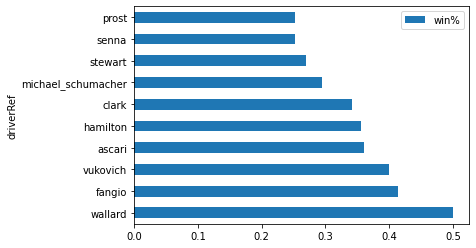

In [186]:
wins5.head(10).plot.barh(y = 'win%', rot = 0)

The above graph details the top 10 highest winning percentages of every F1 driver. However, guys like Wallard and Vukovich each only raced 2 or less races, so it may be better to restrict this graph to drivers who have raced in at least 30 races to be fair.

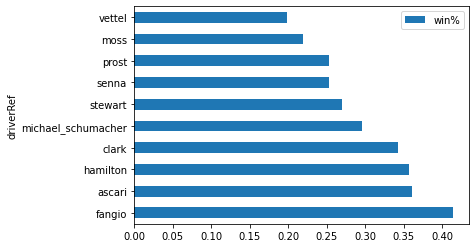

In [187]:
wins6 = wins5[wins5['raceId'] >= 30]
wins6.head(10).plot.barh(y = 'win%', rot = 0)

As we can see in the graph above, Hamilton has the third highest race winning percentage of any driver with at least 30 races at around 36%. And judging from the results for Ascari and Fangio, the two drivers ahead of him, he has the highest winning percentage of any driver with at least 100 races entered including higher than Michael Schumacher, Alain Prost, and Ayrton Senna, his competitors on the wins list.

###Podiums

Although Wins are a very important stat in judging a driver's prowess, a huge statistic in F1 is the concept of a Podium which is finishing in the top 3 of a race or on the podium in which trophies are awarded. It might also be worthwhile to look at podiums in addition to wins to measure a driver's consistency. For example which driver would you consider better given 200 race entries, a driver with 100 wins but 100 last place finishes, or a driver with 80 wins, 80 non-win podiums, and 40 last place finishes. You would probably choose the latter driver. First we will look at the total number of podiums for each F1 driver, then the Podium percentage like we did with wins and restrict to drivers with at least 50 races.

<img src= "https://pbs.twimg.com/media/EhPcg5TXkAAjaJZ?format=jpg&name=large">

In [188]:
pod = resdf1[resdf1['positionOrder'] <= 3] #Filtering for Podiums
pod1 = pod.groupby('driverRef')['raceId'].count()
pod2 = pod1.sort_values(ascending=False)
pod2

driverRef
hamilton              171
michael_schumacher    155
vettel                122
prost                 106
raikkonen             103
                     ... 
moreno                  1
flaherty                1
flockhart               1
follmer                 1
larini                  1
Name: raceId, Length: 214, dtype: int64

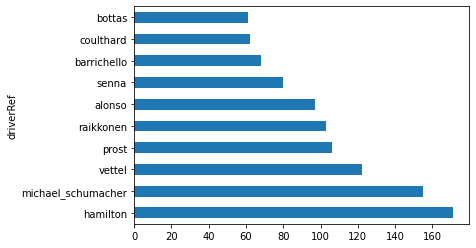

In [189]:
pod2.head(10).plot.barh(rot=0)

In [190]:
pod3 = pd.merge(pod2, races, on = 'driverRef')
pod4 = pod3[pod3['raceId_y']>=50] #Restricting to 50 races
pod4['Podium%'] = pod4['raceId_x']/pod4['raceId_y'] #Creating a new column for Pod%
pod5 = pod4.sort_values(by='Podium%', ascending =False) #Sorting the table
pod5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,raceId_x,raceId_y,Podium%
driverRef,,,
hamilton,171,275,0.621818
fangio,35,58,0.603448
prost,106,202,0.524752
michael_schumacher,155,308,0.503247
senna,80,162,0.493827
...,...,...,...
sato,1,91,0.010989
maldonado,1,96,0.010417
rosa,1,107,0.009346


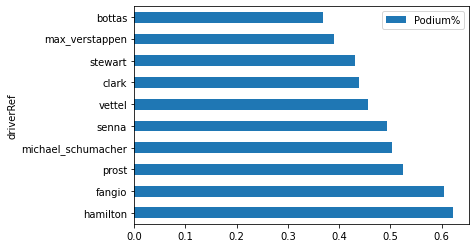

In [191]:
pod5.head(10).plot.barh(y= 'Podium%',rot=0)

Again, astonishingly enough we see Hamilton not only with the most number of podiums in Formula One history with 171, but also the highest percentage of races finishing in the top 3 with over 62% of his races ending on the Podium!!!!

###Poles

Another important facet of F1 is qualifying. The usual schedule of events for a Formula 1 weekend is Practice on Friday in which teams test their racecars and how they react to the track. Next is Qualifying on Saturday in which each car tries to set the fastest lap around the track. The results of each qualfying session determines the starting order for the race on Sunday. I.e. the fastest car in qualifying starts first, second fastest starts second, etc.

It is thus worthwhile to also see how Lewis Hamilton stacks up in Qualifying to see how he fares on Saturdays. The main statistic associated with qualifying is the 'Pole'. Starting on pole means qualifying first. I will first plot the top 10 racers in terms of number of poles achieved then, as I did for wins, plot the Pole % to account for differences in number of races raced through the years, restricting to 30 races.

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaTBH-v65dqMKdcoejY1GCcHutgkjyClnDNQ&usqp=CAU">

In [192]:
pole = resdf1[resdf1['grid'] == 1]
pole1 = pole.groupby('driverRef')['raceId'].count()
pole2 = pole1.sort_values(ascending=False)
pole2

driverRef
hamilton              100
michael_schumacher     68
senna                  65
vettel                 57
clark                  34
                     ... 
maldonado               1
sachs                   1
fagioli                 1
dick_rathmann           1
agabashian              1
Name: raceId, Length: 106, dtype: int64

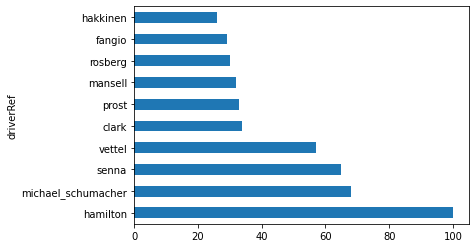

In [193]:
pole2.head(10).plot.barh(rot=0)

In [194]:
pole3 = pd.merge(pole2, races, on = 'driverRef')
pole3['Pole%'] = pole3['raceId_x']/pole3['raceId_y']
pole4 = pole3.sort_values(by='Pole%', ascending=False)
pole5 = pole4[pole4['raceId_y']>=30]
pole5

,raceId_x,raceId_y,Pole%
driverRef,,,
fangio,29,58,0.500000
clark,34,73,0.465753
senna,65,162,0.401235
ascari,14,36,0.388889
hamilton,100,275,0.363636
...,...,...,...
kovalainen,1,112,0.008929
boutsen,1,164,0.006098
hulkenberg,1,182,0.005495


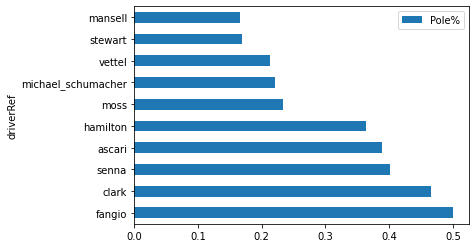

In [195]:
pole5.head(10).plot.barh(y= 'Pole%', rot = 0)

Hamilton has the most poles in Formula 1 history but in terms of Pole% he is fifth behind Fangio, Clark, Senna, and Ascari respectively.

An argument could be made that Hamilton is the greatest Qualifier ever given that of everyone in the top 10 pole % he has the most poles and the most races raced, however guys such as Fangio, Clark, and Ayrton Senna all probably have stronger arguments due to each having as astoningly higher pole % of all over 40% compared to Hamilton's still amazing 36%.

###Front Row Appearances

The last major statistic I will choose to showcase for the purposes of figuring out the GOAT of F1 is the number of front row appearances. The Starting Grid for F1 is in rows of two which means that qualifying first or second will get you a spot on the front row for the Sunday race. This is, similar to how Podiums is an extension of Wins, an extension to the number of Poles for each racer.

In [196]:
front = resdf1[resdf1['grid'] <= 2]
front1 = front.groupby('driverRef')['raceId'].count()
front2 = front1.sort_values(ascending=False)
front2

driverRef
hamilton              165
michael_schumacher    116
vettel                102
senna                  88
prost                  87
                     ... 
zonta                   1
kessler                 1
ken_miles               1
kavanagh                1
Changy                  1
Name: raceId, Length: 457, dtype: int64

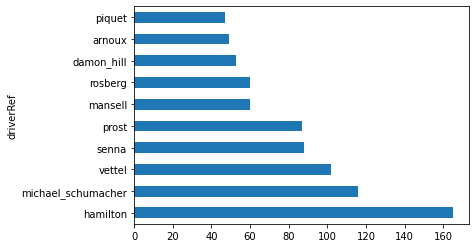

In [197]:
front2.head(10).plot.barh(rot=0)

In [198]:
front3 = pd.merge(front2, races, on = 'driverRef')
front3['FrontRow%'] = front3['raceId_x']/front3['raceId_y']
front4 = front3.sort_values(by='FrontRow%', ascending=False)
front5 = front4[front4['raceId_y'] >= 30]
front5

,raceId_x,raceId_y,FrontRow%
driverRef,,,
fangio,42,58,0.724138
schneider,23,32,0.718750
hamilton,165,275,0.600000
ascari,21,36,0.583333
clark,42,73,0.575342
...,...,...,...
rosa,1,107,0.009346
salo,1,111,0.009009
kvyat,1,112,0.008929


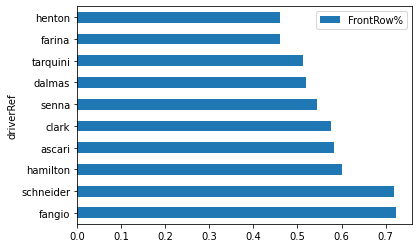

In [199]:
front5.head(10).plot.barh(y="FrontRow%", rot = 0)

Looking at the number of Front Row appearances, Hamilton clearly has by far the most in Formula One history with over 160 front row appearances, but again he trails Fangio based upon percentage of front row appearances and races raced.

Finally, the number of championships is relevant to the Greatest of All Time discussion as well. Below is a chart which shows the drivers with the most number of championships along with the seasons the raced in.

<img src = 'https://ichef.bbci.co.uk/onesport/cps/624/cpsprodpb/CDF9/production/_115392725_f1_hamilton_championship_history_2020_v1.png'>

Hamilton and Schumacher each are tied for the most championships in F1 with 7 a piece, although Hamilton has 7 in 15 seasons while Schumacher has his 7 in 19 seasons. Fangio has 5 titles in 8 seasons, then following him is Prost and Vettel each with 4, and Senna with 3 titles.

Again, Hamilton leads the counting statistic while Fangio leads the rate statistic in terms of championship %.

##Conclusion

There is no one driver that leads every relevant and fair statistic in the Formula One history books. Therefore, the choice of each person's "Greatest of All Time" may be different depending on what they value. I will breakdown what each person values and the corresponding GOAT to that value.


####Wins
If a person values wins most, the Hamilton is the clear choice of the Greatest of All Time. He has the most wins in Formula One history if you value counting stats most with 98, but if you value rate statistics more Fangio has the highest win rate with 42%.

####Podiums
If a person wants to take into account Podiums for consistently being at the top of the field even if the racer doesn't always get first place, Hamilton has the most with 171, and if you value rate statistics Hamilton also tops the field with 62% of his races ending in a finish in the top 3.

####Poles
If a person values how fast a driver can push their car compared to everyone else they race against, Hamilton leads F1 history with over 100 poles, but Fangio, Clark, Senna, and Ascari each have higher Pole rates than Hamilton who is in fifth.

####Front Row Appearances
Similar to Poles, if a person values a driver being super fast in qualifying but also a measure of consistently being one of the fastest even if not THE fastest, front row appearances are a good stat. Hamilton, again, leads F1 history with 165 front row appearances, and in rate stats, Fangio leads the field, with Hamilton in third.

####Championships
Hamilton and Schumacher each have the most championships if that is what you value most. Although both have 7 titles, Hamilton has achieved his in less time which gives him the edge. The only other driver that has a claim at winning the championship argument is Fangio, with 5 titles which is less than Hamilton, but doing so in only 8 seasons.


####My Pick:
Taking into account all of the counting stats such as wins, podiums, poles, front row appearances, and championships won my pick for the Greatest of All Time is Lewis Hamilton. Although Fangio has higher rate statistics than Hamilton, I believe accumulating better counting stats in a much more competitive era in which there is a much steeper boundary to even making it into F1 puts him over the top. ***So the answer to the question is Lewis Hamilton the Greatest Of All Time? YES***